In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [ ]:
df= pd.read_csv('/home/car_data.csv')

In [ ]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
#no labels so we are making our own (supervised learning)

headers = ["symboling", "normalized-losses", "make",
		"fuel-type", "aspiration","num-of-doors",
		"body-style","drive-wheels", "engine-location",
		"wheel-base","length", "width","height", "curb-weight",
		"engine-type","num-of-cylinders", "engine-size",
		"fuel-system","bore","stroke", "compression-ratio",
		"horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df.columns=headers
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [ ]:
data = df

# Finding the missing values
data.isna().any()

# Finding if missing values
data.isnull().any()


symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
price                False
dtype: bool

In [ ]:
print(data.columns)

data.dtypes


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
 #pricing has type object(string) instead of float

data.price.unique()


array(['16500', '13950', '17450', '15250', '17710', '18920', '23875', '?',
       '16430', '16925', '20970', '21105', '24565', '30760', '41315',
       '36880', '5151', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '6529', '7129', '7295', '7895', '9095', '8845', '10295', '12945',
       '10345', '6785', '11048', '32250', '35550', '36000', '5195',
       '6095', '6795', '6695', '7395', '10945', '11845', '13645', '15645',
       '8495', '10595', '10245', '10795', '11245', '18280', '18344',
       '25552', '28248', '28176', '31600', '34184', '35056', '40960',
       '45400', '16503', '5389', '6189', '6669', '7689', '9959', '8499',
       '12629', '14869', '14489', '6989', '8189', '9279', '5499', '7099',
       '6649', '6849', '7349', '7299', '7799', '7499', '7999', '8249',
       '8949', '9549', '13499', '14399', '17199', '19699', '18399',
       '11900', '13200', '12440', '13860', '15580', '16900', '16695',


In [ ]:
# Here it contains '?', so we Drop it
data = data[data.price != '?']

data['price'] = data['price'].astype(int)
data.dtypes

<ipython-input-20-605c85fb0b05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].astype(int)


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
199       Low
200    Medium
201    Medium
202    Medium
203    Medium
Name: price-binned, Length: 200, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


<ipython-input-21-4167ebfe50f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data['length']/data['length'].max()
<ipython-input-21-4167ebfe50f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['width'] = data['width']/data['width'].max()
<ipython-input-21-4167ebfe50f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

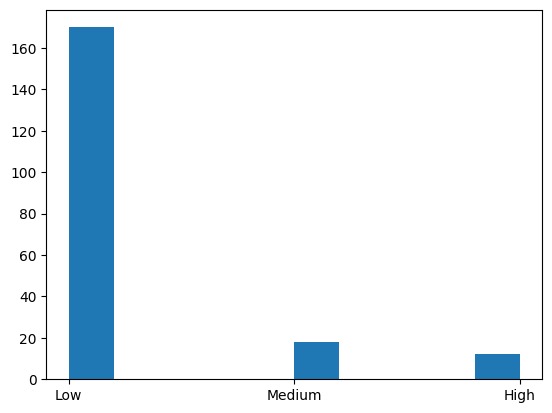

In [ ]:
#Normalizing values by using simple feature scaling method examples(do for the rest) and binning- grouping values
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

# binning- grouping values
bins = np.linspace(min(data['price']), max(data['price']), 4)
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins,
							labels = group_names,
							include_lowest = True)

print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()


In [ ]:
#Step 7: Doing descriptive analysis of data categorical to numerical values.
# categorical to numerical variables
pd.get_dummies(data['fuel-type']).head()

# descriptive analysis
# NaN are skipped
data.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


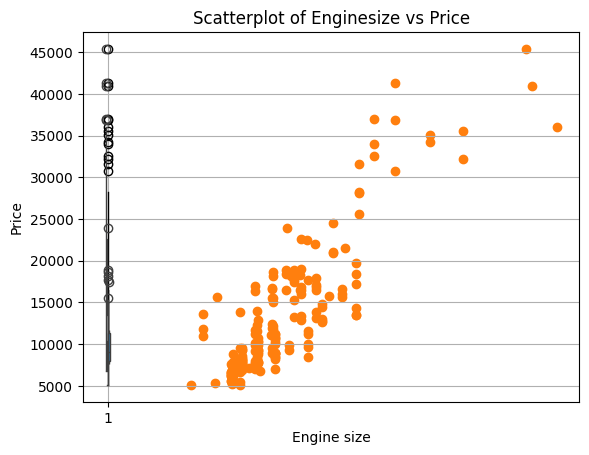

In [ ]:
#Step 8: Plotting the data according to the price based on engine size.

# examples of box plot
plt.boxplot(data['price'])

# by using seaborn
sns.boxplot(x ='drive-wheels', y ='price', data = data)

# Predicting price based on engine size
# Known on x and predictable on y
plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()


In [ ]:
#Step 9: Grouping the data according to wheel, body-style and price.

# Grouping Data
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],
						as_index = False).mean()

data_grp


# mean price of each body style, along with drive train

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


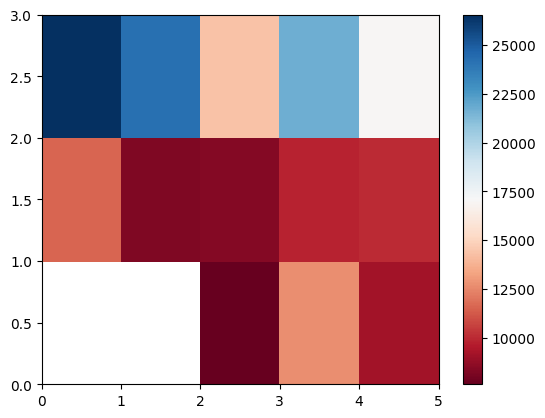

In [ ]:
#Step 10: Using the pivot method and plotting the heatmap according to the data obtained by pivot method

# pivot method
data_pivot = data_grp.pivot(index = 'drive-wheels',
							columns = 'body-style')
data_pivot

# heatmap for visualizing data
plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()


F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53473.513073397036)

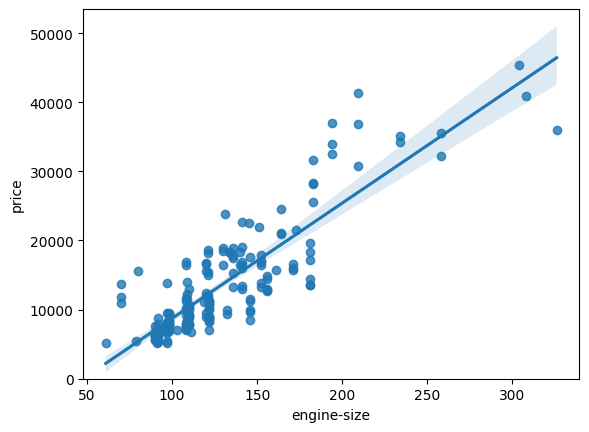

In [ ]:
#Step 11: Obtaining the final result and showing it in the form of a graph. As the slope is increasing in a positive direction, it is a positive linear relationship.

# Analysis of Variance- ANOVA
# returns f-test and p-value
# f-test = variance between sample group means divided by
# variation within sample group
# p-value = confidence degree
data_annova = data[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
							grouped_annova.get_group('honda')['price'],
							grouped_annova.get_group('subaru')['price']
									)
print(annova_results_l)

# strong corealtion between a categorical variable
# if annova test gives large f-test and small p-value

# Correlation- measures dependency, not causation
sns.regplot(x ='engine-size', y ='price', data = data)
plt.ylim(0, )


In [ ]:
#---------------------------Improvements---------------------------


#Lets assume:
# We have a budget of $25,000
# We either want a car that has AWD or FWD
# We want a car with good gas milage
# We have brand preference

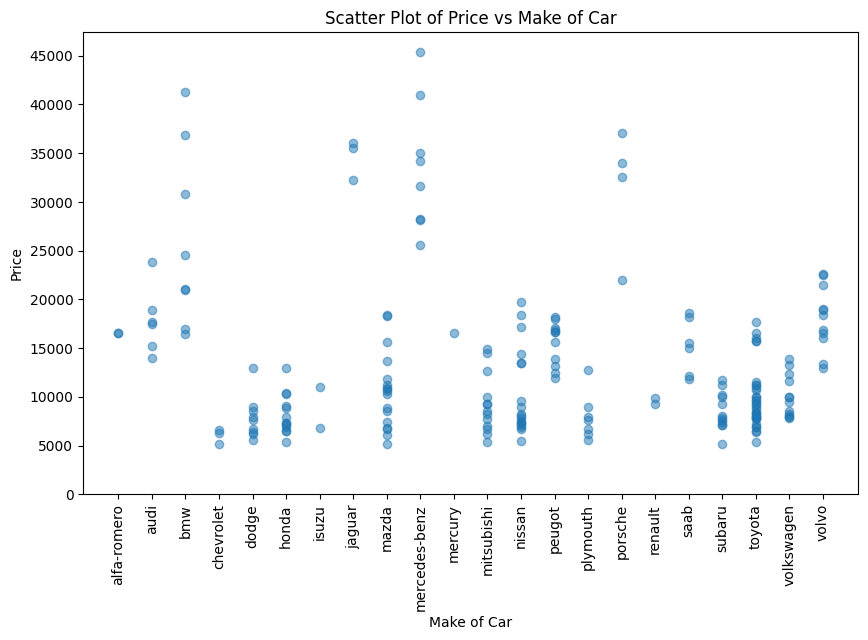

In [ ]:
#converts price into a number, and all errors NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with NaN values in 'price' column
df = df.dropna(subset=['price'])


price = df['price']
make = df['make']


plt.figure(figsize=(10,6))
plt.scatter(make, price, alpha=0.5)
plt.title('Scatter Plot of Price vs Make of Car')
plt.xlabel('Make of Car')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis
plt.yticks(ticks=range(0, int(max(price)), 5000))
plt.show()

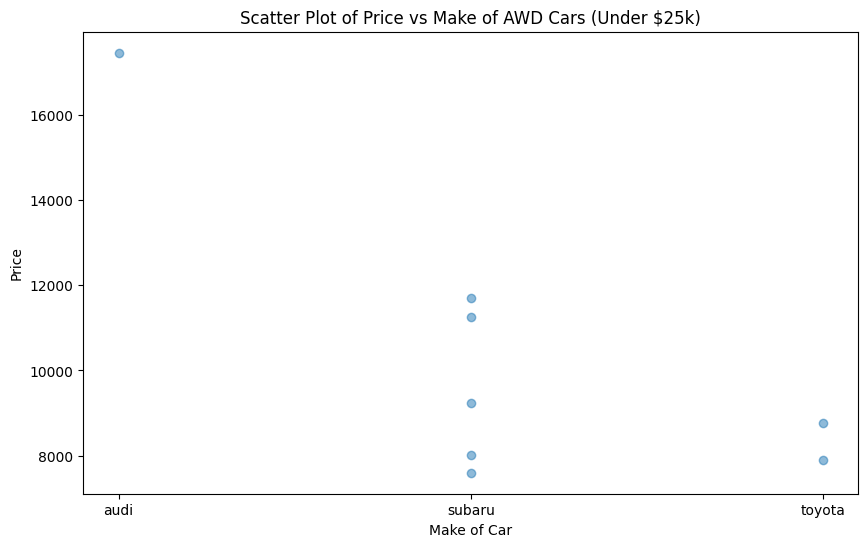

In [ ]:
# Filter the dataset for AWD cars from specified makes and under $25k
filtered_df = df[(df['drive-wheels'] == '4wd') &
                 (df['make'].isin(['subaru', 'honda', 'toyota', 'nissan', 'audi'])) &
                 (df['price'] < 25000)]


price = filtered_df['price']
make = filtered_df['make']


plt.figure(figsize=(10,6))
plt.scatter(make, price, alpha=0.5)
plt.title('Scatter Plot of Price vs Make of AWD Cars (Under $25k)')
plt.xlabel('Make of Car')
plt.ylabel('Price')



plt.show()


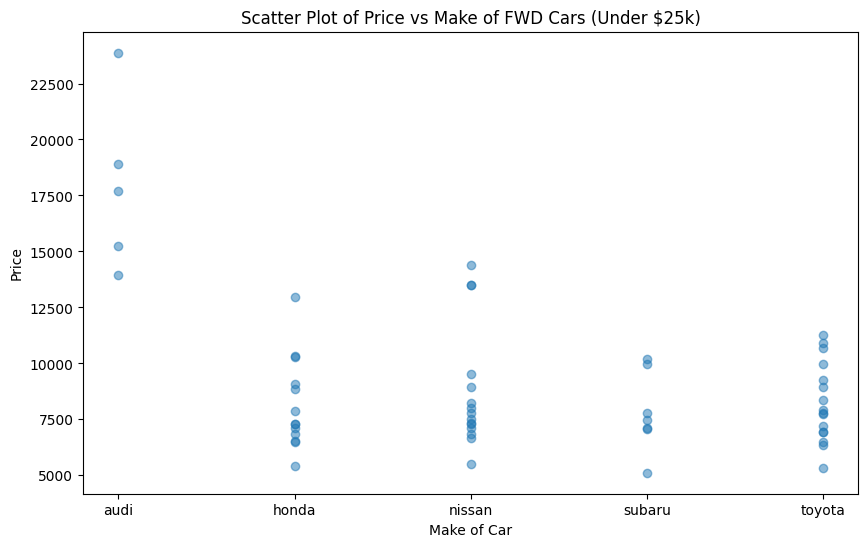

In [ ]:
filtered_df = df[(df['drive-wheels'] == 'fwd') &
                 (df['make'].isin(['subaru', 'honda', 'toyota', 'nissan', 'audi'])) &
                 (df['price'] < 25000)]


price = filtered_df['price']
make = filtered_df['make']

plt.figure(figsize=(10,6))
plt.scatter(make, price, alpha=0.5)
plt.title('Scatter Plot of Price vs Make of FWD Cars (Under $25k)')
plt.xlabel('Make of Car')
plt.ylabel('Price')



plt.show()


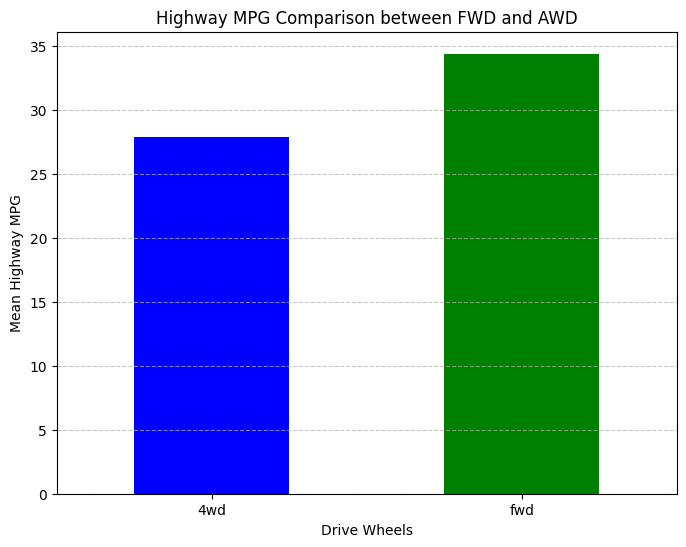

In [ ]:
# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Filter cars from specified makes with price under $25k and drive-wheels is not 'rwd'
makes = ['subaru', 'honda', 'toyota', 'nissan', 'audi']
filtered_df = df[(df['make'].str.lower().isin(makes)) & (df['price'] < 25000) & (df['drive-wheels'] != 'rwd')]

# Group by 'drive-wheels' and calculate mean highway MPG
grouped = filtered_df.groupby('drive-wheels')['highway-mpg'].mean()


plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color=['blue', 'green'])
plt.title('Highway MPG Comparison between FWD and AWD')
plt.xlabel('Drive Wheels')
plt.ylabel('Mean Highway MPG')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

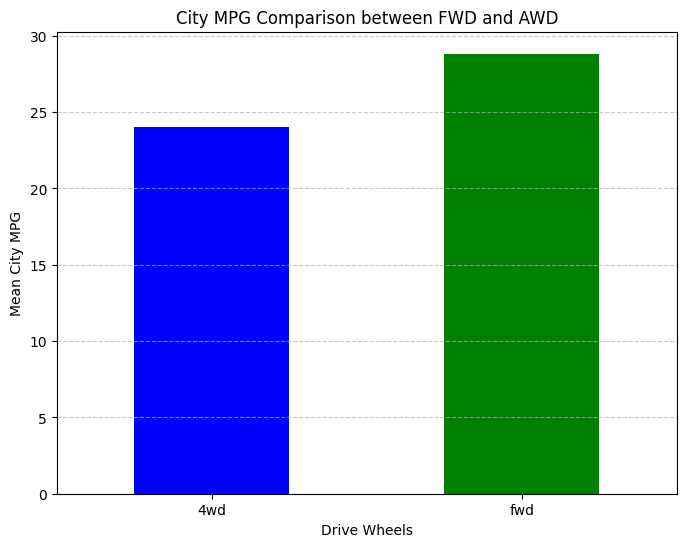

In [ ]:
# Filter cars from specified makes with price under $25k and drive-wheels is not 'rwd'
makes = ['subaru', 'honda', 'toyota', 'nissan', 'audi']
filtered_df = df[(df['make'].str.lower().isin(makes)) & (df['price'] < 25000) & (df['drive-wheels'] != 'rwd')]

# Group by 'drive-wheels' and calculate mean city MPG
grouped = filtered_df.groupby('drive-wheels')['city-mpg'].mean()


plt.figure(figsize=(8, 6))
grouped.plot(kind='bar', color=['blue', 'green'])
plt.title('City MPG Comparison between FWD and AWD')
plt.xlabel('Drive Wheels')
plt.ylabel('Mean City MPG')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


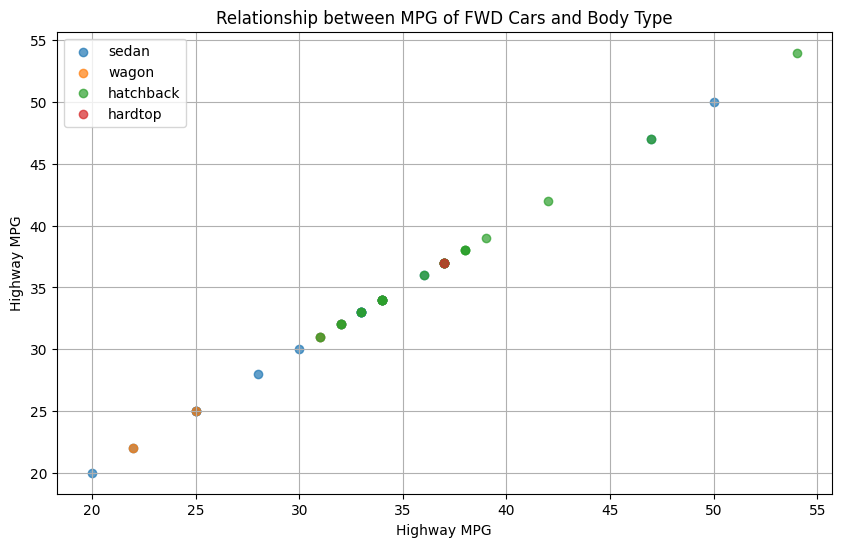

In [ ]:
specified_makes = ['subaru', 'honda', 'toyota', 'nissan', 'audi']

# Filter the dataset for specified makes, FWD cars, and non-null values in 'highway-mpg' and 'body-style' columns
filtered_df = df[(df['make'].str.lower().isin(specified_makes)) & (df['drive-wheels'] == 'fwd')
                 & df['highway-mpg'].notna() & df['body-style'].notna()]

# Plot relationship between MPG of FWD cars and body type
plt.figure(figsize=(10, 6))
for body_style in filtered_df['body-style'].unique():
    plt.scatter(filtered_df[filtered_df['body-style'] == body_style]['highway-mpg'],
                filtered_df[filtered_df['body-style'] == body_style]['highway-mpg'],
                label=body_style, alpha=0.7)
plt.title('Relationship between MPG of FWD Cars and Body Type')
plt.xlabel('Highway MPG')
plt.ylabel('Highway MPG')
plt.legend()
plt.grid(True)
plt.show()

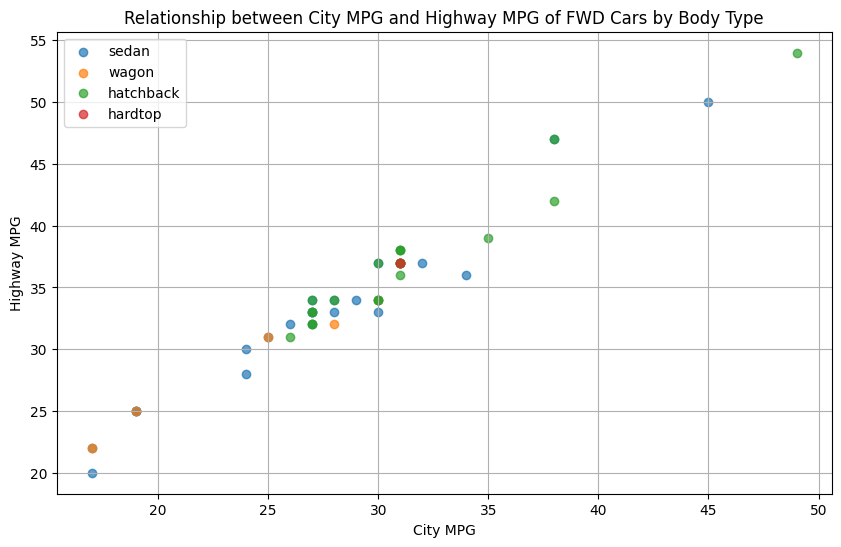

In [ ]:
# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Specify the makes to include
specified_makes = ['subaru', 'honda', 'toyota', 'nissan', 'audi']

# Filter the dataset for specified makes, FWD cars, and non-null values in 'highway-mpg' and 'body-style' columns
filtered_df = df[(df['make'].str.lower().isin(specified_makes)) & (df['drive-wheels'] == 'fwd')
                 & df['highway-mpg'].notna() & df['body-style'].notna()]

# Plot relationship between MPG of FWD cars and body type
plt.figure(figsize=(10, 6))
for body_style in filtered_df['body-style'].unique():
    plt.scatter(filtered_df[filtered_df['body-style'] == body_style]['city-mpg'],
                filtered_df[filtered_df['body-style'] == body_style]['highway-mpg'],
                label=body_style, alpha=0.7)
plt.title('Relationship between City MPG and Highway MPG of FWD Cars by Body Type')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.legend()
plt.grid(True)
plt.show()

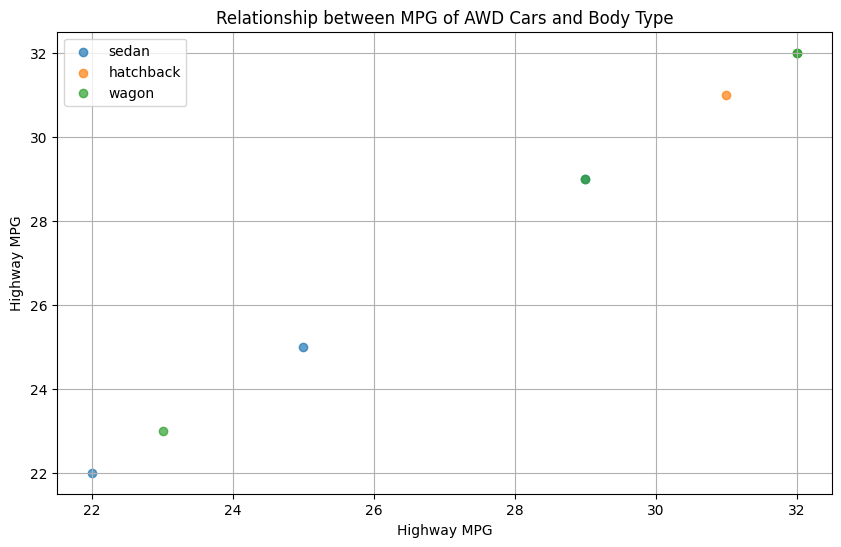

In [ ]:
specified_makes = ['subaru', 'honda', 'toyota', 'nissan', 'audi']

# Filter the dataset for specified makes, AWD cars, and non-null values in 'highway-mpg' and 'body-style' columns
filtered_df = df[(df['make'].str.lower().isin(specified_makes)) & (df['drive-wheels'] == '4wd')
                 & df['highway-mpg'].notna() & df['body-style'].notna()]

# Plot relationship between MPG of AWD cars and body type
plt.figure(figsize=(10, 6))
for body_style in filtered_df['body-style'].unique():
    plt.scatter(filtered_df[filtered_df['body-style'] == body_style]['highway-mpg'],
                filtered_df[filtered_df['body-style'] == body_style]['highway-mpg'],
                label=body_style, alpha=0.7)
plt.title('Relationship between MPG of AWD Cars and Body Type')
plt.xlabel('Highway MPG')
plt.ylabel('Highway MPG')
plt.legend()
plt.grid(True)
plt.show()

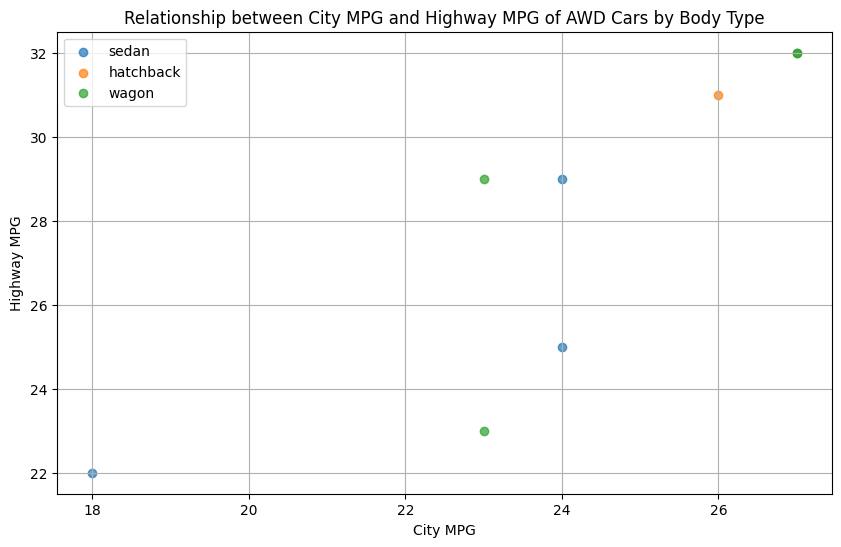

In [ ]:
# Convert 'price' column to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Specify the makes to include
specified_makes = ['subaru', 'honda', 'toyota', 'nissan', 'audi']

# Filter the dataset for specified makes, AWD cars, and non-null values in 'highway-mpg' and 'body-style' columns
filtered_df = df[(df['make'].str.lower().isin(specified_makes)) & (df['drive-wheels'] == '4wd')
                 & df['highway-mpg'].notna() & df['body-style'].notna()]

# Plot relationship between MPG of AWD cars and body type
plt.figure(figsize=(10, 6))
for body_style in filtered_df['body-style'].unique():
    plt.scatter(filtered_df[filtered_df['body-style'] == body_style]['city-mpg'],
                filtered_df[filtered_df['body-style'] == body_style]['highway-mpg'],
                label=body_style, alpha=0.7)
plt.title('Relationship between City MPG and Highway MPG of AWD Cars by Body Type')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Using these graphs and data set:



# FWD - Subaru, Honda, Nissan, Toyoda are our best brands
#     - Hatchback, Sedan are our best body type
#     - Get the best gas-milage

#AWD - Subaru, Toyoda are our best brands
#    - Hatchback, Wagon are our best body type
#    - Still good gas-milage but trade off for AWD features


#FWD cars have better gas-milage in city and highway scenarios
#AWD cars have more capabilities due to AWD


# As a buyer with a Budget of $25k and looking for good gas-milage car
# We are able to conclude that the best car for us will be:

#FWD Toyoda Hatchback